# House Price Prediction Using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy, math

In [2]:
train = pd.read_csv("./dataset/train.csv")

In [3]:
train.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590,6000.00,98144,795000
1,4,2.0,2240,0.31,98106,915000
2,4,3.0,2040,3783.00,98107,950000
3,4,3.0,3800,5175.00,98199,1950000
4,2,2.0,1042,NaN,98102,950000


In [4]:
train.shape

(2016, 6)

## Handling missing values

In [5]:
train.isnull().sum()

beds          0
baths         0
size          0
lot_size    347
zip_code      0
price         0
dtype: int64

<AxesSubplot: >

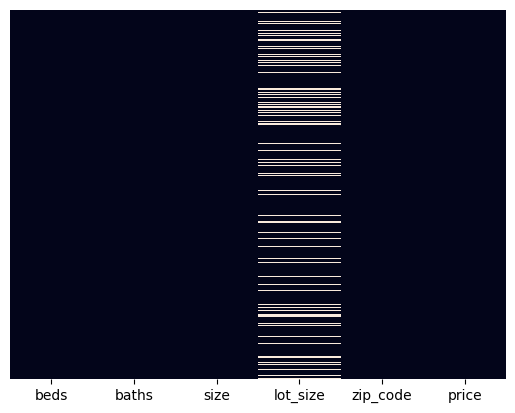

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [7]:
train['lot_size'] = train['lot_size'].fillna(train['lot_size'].mean())

<AxesSubplot: >

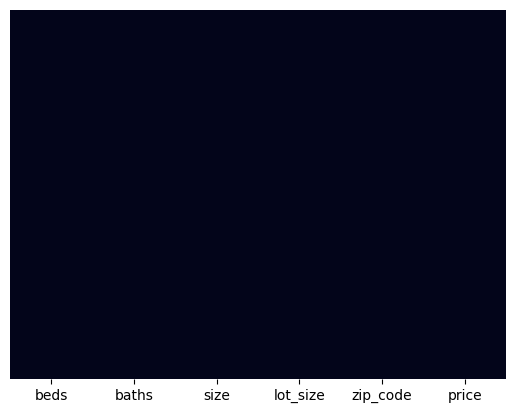

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [31]:
x_train = np.array(train.iloc[:, :-1])
y_train = x_train[:, -1]


#x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])



In [46]:
x_train.shape, y_train.shape

((2016, 5), (2016,))

In [11]:
w_init = np.zeros(x_train.shape[1])
b_init = 0

In [12]:
w_init.shape

(4,)

## Multiple Linear Regression

In [16]:
"""
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_w = np.zeros((n,))
    dj_b = 0
    
    #m = rows, n = columns
    for i in range (m):
        err = (np.dot(x[i] * w) + b) - y[i]
        for j in range (n):
            dj_w[j] = dj_w[j] + err * x[i, j]
        dj_b = dj_b + err
    
    dj_w = dj_w / m
    dj_b = dj_b / m
    return dj_w, dj_b
"""
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [28]:
"""
def gradient_descent(x, y, w_in, b_in, compute_gradient, alpha, num_iters):
    for i in range (num_iters):
        dj_w, dj_b = compute_gradient(x, y, w_in, b_in)
        
        w = w - alpha * dj_w
        b = b - alpha * dj_b
    return w, b
"""
def gradient_descent(X, y, w_in, b_in, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        
    return w, b

In [45]:
iterations = 1000
alpha = 0.01
gradient_descent(x_train, y_train, np.array([0.0, 0.0, 0.0, 0.0, 0.0]), 0.0, compute_gradient, alpha, iterations)
#compute_gradient(x_train, y_train, np.array([0.0, 0.0, 0.0, 0.0]), 0.0)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2632\1719497281.py:38: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i, j]
C:\Users\Acer\AppData\Local\Temp\ipykernel_2632\2094045211.py:40: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw               ##None


(array([nan, nan, nan, nan, nan]), nan)